In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import datetime
#libraries that will be used for data collection, storing, cleaning

In [2]:
raw_data=pd.read_csv('data.csv')  #reading in the raw data from the csv and stored into dataframe

/Users/raj/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning:

Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.



In [3]:
#cleaning the data

#dropping the duplicate and unwanted columns
after_dropped_data=raw_data.drop(columns=['Location','Updated On','X Coordinate','Y Coordinate']) #columns which are not necessary and are duplicates


#converting the date column from string to datetime
after_dropped_data['Date']=after_dropped_data['Date'].apply(lambda x:datetime.datetime.strptime(x, '%m/%d/%Y %H:%M:%S %p'))
#counting for each column of how many null values are there
count=after_dropped_data.isna().sum() 

#getting the selected colums with null values and their count
def get_cols_withNan(series):      
    hasNaN_col=[]
    for index, value in series.items():
        if(value>0):
            hasNaN_col.append(index)
    return series[hasNaN_col]


#fixing the NaN data

# #total count of non null values
nonNull_columns= after_dropped_data.count()

# #total columns with null values
Columns_with_null=get_cols_withNan(count)

#comparing null vs non null
percent=(Columns_with_null/nonNull_columns)*100

#final dataframe with the data
columns={'Total Null':Columns_with_null,'Total Non-Null':nonNull_columns,'Percent':percent}
NullvsNonNull=pd.DataFrame(columns).dropna()

#from the table it is visible that what columns have nulls and their percents
print(NullvsNonNull)



                      Total Null  Total Non-Null   Percent
Case Number                  4.0         7083777  0.000056
Community Area          613495.0         6470286  9.481729
District                    47.0         7083734  0.000663
Latitude                 67990.0         7015791  0.969100
Location Description      6320.0         7077461  0.089298
Longitude                67990.0         7015791  0.969100
Ward                    614828.0         6468953  9.504289


In [4]:
# cleaniing the instances which have NaN

#it is visible that Column Ward has 9.50% and Column Area has 9.48% null values so I am dropping that column too.
after_dropped_data=after_dropped_data.drop(columns=['Community Area','Ward'])
#replacing null values
#district, location description set to unknown  and longitude-latitude set to chicago in general 
changeNaN={'Case Number':0,'District':'Unknown','Location Description':'Unknown','Latitude':41.8781,'Longitude':87.6298}
after_dropped_data.fillna(changeNaN,inplace=True)

after_dropped_data.notna().all()
#data has been prepared and cleaned now

ID                      True
Case Number             True
Date                    True
Block                   True
IUCR                    True
Primary Type            True
Description             True
Location Description    True
Arrest                  True
Domestic                True
Beat                    True
District                True
FBI Code                True
Year                    True
Latitude                True
Longitude               True
dtype: bool

       Crime Count
Month             
7           655582
8           648995
5           626869
6           623900
10          614687
9           608124
4           580234
3           578681
1           567903
11          553495


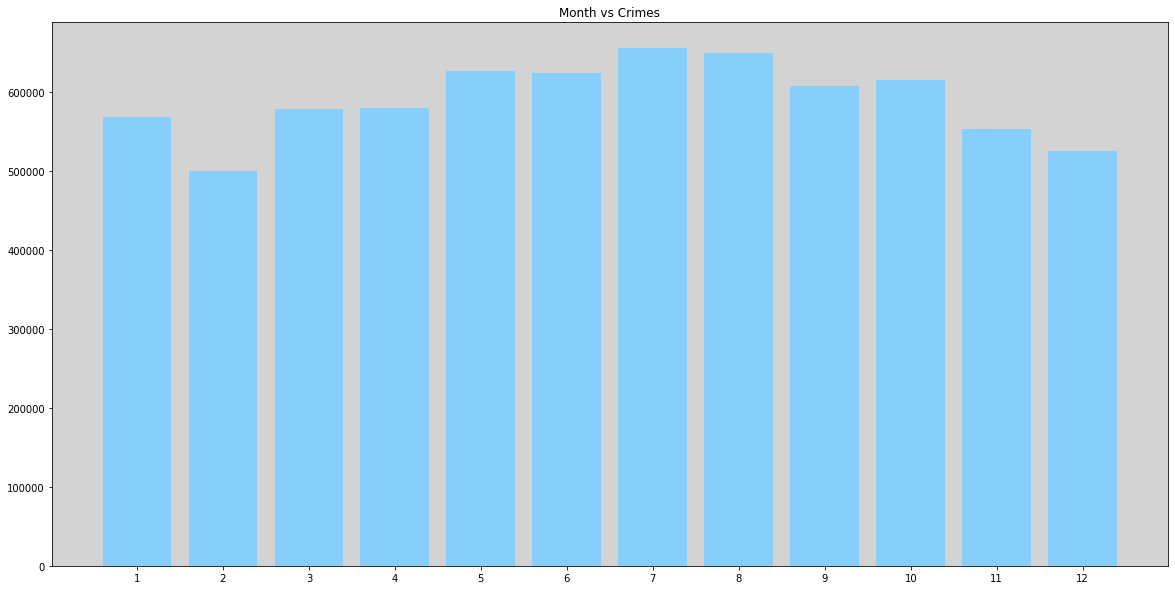

     Crime Count
Day             
1         279288
15        240844
20        236583
10        234198
17        233589
14        233223
16        232887
12        232090
18        231834
21        231590


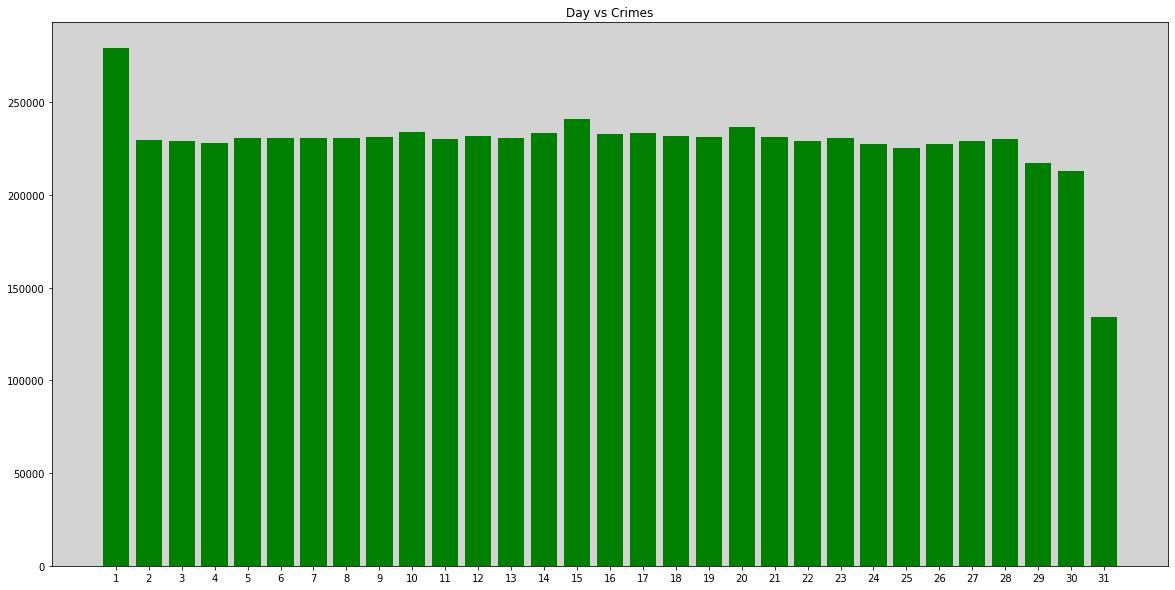

      Crime Count
Hour             
12         795409
9          696188
10         684107
8          641739
11         632546
7          564452
1          561432
2          547304
3          529094
6          501938


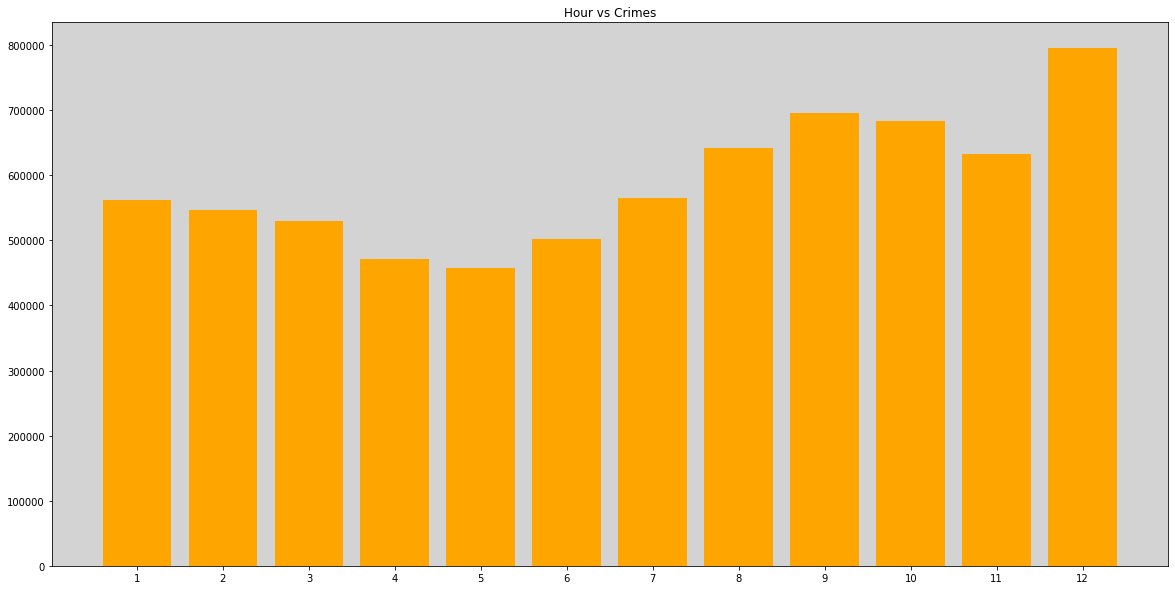

In [61]:
#Crime with time/date insights

months =after_dropped_data['Date'].dt.month #getting the months from the date
days=after_dropped_data['Date'].dt.day #getting the days from the date
hours=after_dropped_data['Date'].dt.hour #getting the hours from the date
after_dropped_data['Day']=days
after_dropped_data['Hour']=hours
after_dropped_data['Month']=months

#groups by month and counts the number
groupby_Month=after_dropped_data[['Month','Date']].groupby('Month').count().rename(columns={'Date': 'Crime Count'})
#groups by days of month and counts the number
groupby_Day=after_dropped_data[['Day','Date']].groupby('Day').count().rename(columns={'Date': 'Crime Count'})
#groups by Hour of the day and counts the number
groupby_Hour=after_dropped_data[['Hour','Date']].groupby('Hour').count().rename(columns={'Date': 'Crime Count'})



def plotTimes(x,y,tl,colr,plotType): #takes in dataframe and makes the plot
    fig, ax = plt.subplots(figsize=(20,10))  # Create a figure containing a single axes.
    if(plotType=='line'):
        ax.plot(x,y,color=colr,linewidth=2) #sets the color for the line and plots the data
    else:
        ax.bar(x,y,color=colr) #bar plot
    ax.set_facecolor('lightgray') #sets the background
    ax.set_title(tl) #sets the title
    if(x.dtype=='object'):
        ax.set_xticklabels(x,rotation=270)
    else:
        ax.set_xticks(x)
    plt.show()
    
print(groupby_Month.nlargest(10,'Crime Count')) # gets the top 10 months with highest crime
plotTimes(groupby_Month.index,groupby_Month['Crime Count'],'Month vs Crimes','lightskyblue','bar') #plotting the Month vs time
print(groupby_Day.nlargest(10,'Crime Count'))  # gets the top 10 days with highest crime
plotTimes(groupby_Day.index,groupby_Day['Crime Count'],'Day vs Crimes','green','bar')
print(groupby_Hour.nlargest(10,'Crime Count')) # gets the top 10 Hours with highest crime
plotTimes(groupby_Hour.index,groupby_Hour['Crime Count'],'Hour vs Crimes','orange','bar')

                            #following is used to plot using plotly library. it is the best.
# def plotTimes(x,y,colr,titl):
#     fig = go.Figure(data=go.Bar(x=x,y=y, marker_color=colr,text=y,textposition='auto'))
#     fig.update_layout(title_text=titl,plot_bgcolor='lightgray')
#     fig.show()

# plotTimes(groupby_Month.index,groupby_Month['Date'],'lightskyblue','Months vs Crime')
# plotTimes(groupby_Day.index,groupby_Day['Date'],'green','Days vs Crime')
# plotTimes(groupby_Hour.index,groupby_Hour['Date'],'orange','Hours vs Crime')


## Some Insights about the time of day,day of month ,month of year vs Crimes in total  
1.Maximum crimes took place in the month of july with 655582 incidents, followed by August with 648995            incidents.  
2.Maximum crimes took place on 1st day of months with 279288 incidents, followed by 15th day of the              months with 240844 incidents.  
3.Maximum crimes took place during the the 12th hour with 795409 incidents,followed by 9th hour with 696188 incidents.   
        

    Year  Crime Count  Arrest  Percent of Arrest
4   2005       453722  140900          31.054258
3   2004       469392  144689          30.824769
5   2006       448131  135393          30.212817
6   2007       437035  131862          30.171954
2   2003       475954  141577          29.745942
0   2001       485764  141907          29.213157
1   2002       486762  141555          29.080947
13  2014       275452   79566          28.885613
8   2009       392744  110776          28.205651
12  2013       307231   86484          28.149503
             Year    Crime Count        Arrest  Percent of Arrest
count    20.00000      20.000000      20.00000          20.000000
mean   2010.50000  354189.050000   97203.80000          26.585949
std       5.91608  113301.631069   39667.43275           3.901221
min    2001.00000   37406.000000    8276.00000          19.554005
25%    2005.75000  269122.250000   66164.00000          24.843063
50%    2010.50000  361109.500000   98374.00000          27.752611

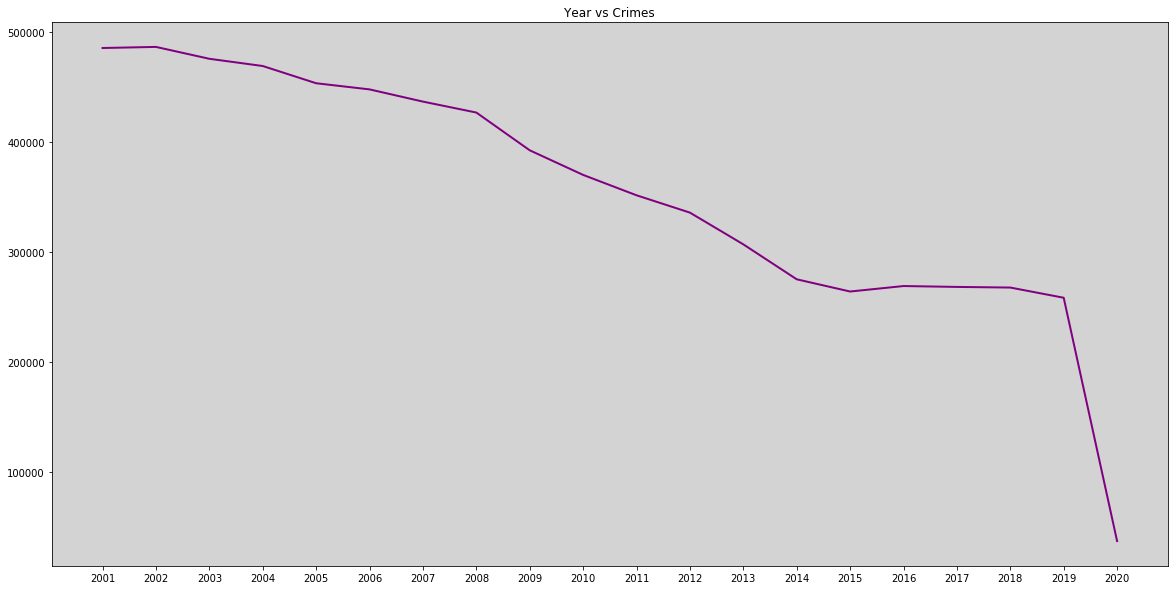

In [17]:
#insights and pattern crimes,number of arrestsand many other relations
#groupping by year and reseting the index
groupby_Year=after_dropped_data[['ID','Year']].groupby('Year').count().rename(columns={'ID': 'Crime Count'}).reset_index()

#grouping by year and arrest in order to get the percent of arrests made
groupby_Arrests_Year=after_dropped_data[['Arrest','Year','ID']].groupby(['Year','Arrest']).count().rename(columns={'ID': 'Crime Count'})
# reseting the index
groupby_Arrests_Year.reset_index(inplace=True)
#getting only the count of rows where Arrests where made
groupby_Arrests_Year.drop(groupby_Arrests_Year[groupby_Arrests_Year['Arrest']==False].index,inplace=True)
groupby_Arrests_Year.reset_index(inplace=True)

#merging the counted arrests into the year groupby frame
groupby_Year['Arrest']=groupby_Arrests_Year['Crime Count']

groupby_Year['Percent of Arrest']= (groupby_Year['Arrest']/groupby_Year['Crime Count'])*100
print(groupby_Year.nlargest(10,'Percent of Arrest'))
print(groupby_Year.describe())

#plotting the year and Crime Count
plotTimes(groupby_Year['Year'],groupby_Year['Crime Count'],'Year vs Crimes','purple','line')


## Insights for Crimes vs Year (from 2001-2019)
1. Looking at the Plot above it can be clearly seen that the Crimes have decreasing trend with increase in years.
2. From 2015 to 2019 theres is no significant decrease like it is from 2001 to 2014. it can also be seen there has been slight increase from 2015 to 2016 and then  decreasing trend from 2018 to 2019.
3. The maximum number of crimes where maximum in year 2001 and the least were in year 2019.

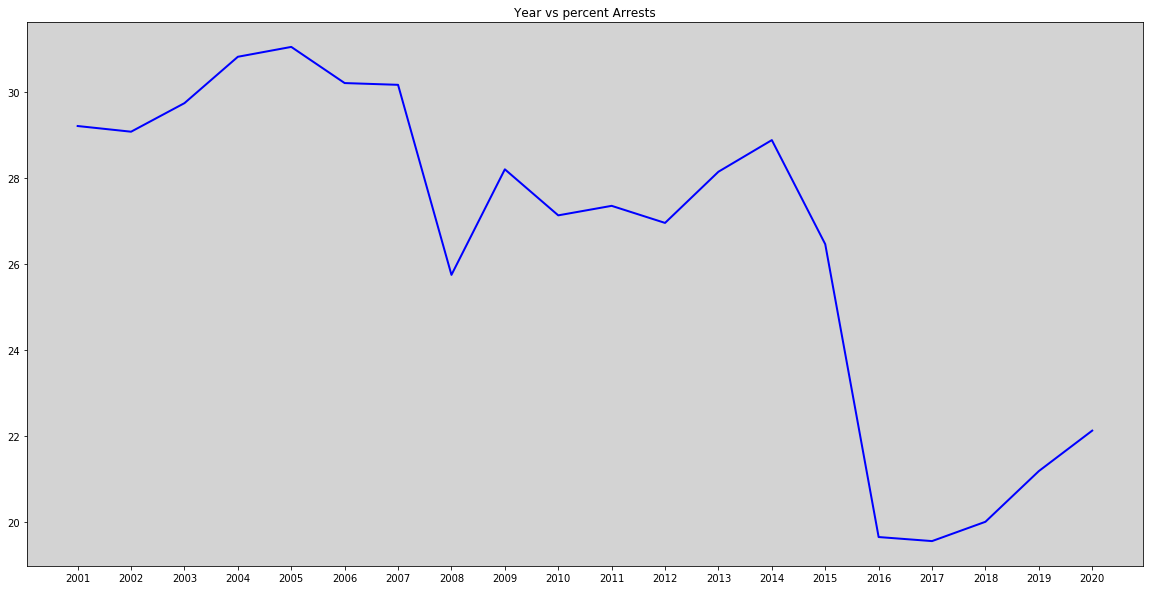

In [18]:
#plotting percent Arrests in a year
plotTimes(groupby_Year['Year'],groupby_Year['Percent of Arrest'],'Year vs percent Arrests','blue','line')

## Insights for Percent Arrest vs Year (from 2001-2020)
1. Looking at the plot it can be inferred that there is any kind of trend. There is a sudden drop in arrests in year 2007 and 2015.
2. Maximum arrest rate was in 2005 with 31.055% and lowest was in 2015 with 19.55%.

Primary Type    False
Arrested        False
Not Arrested    False
dtype: bool
         Primary Type  Arrested  Not Arrested  Arrest Percentage
9   DOMESTIC VIOLENCE         1           0.0         100.000000
26       PROSTITUTION     68894         267.0          99.613944
27   PUBLIC INDECENCY       176           1.0          99.435028
18          NARCOTICS    725587        4216.0          99.422310
10           GAMBLING     14467         104.0          99.286254
           Primary Type  Arrested  Not Arrested  Arrest Percentage
12    HUMAN TRAFFICKING         6          59.0           9.230769
17  MOTOR VEHICLE THEFT     29356      296561.0           9.007201
6       CRIMINAL DAMAGE     56597      748651.0           7.028518
20         NON-CRIMINAL        11         161.0           6.395349
3              BURGLARY     22983      377575.0           5.737746
            Arrested  Not Arrested  Arrest Percentage
count      35.000000  3.500000e+01          35.000000
mean    55545.028571  

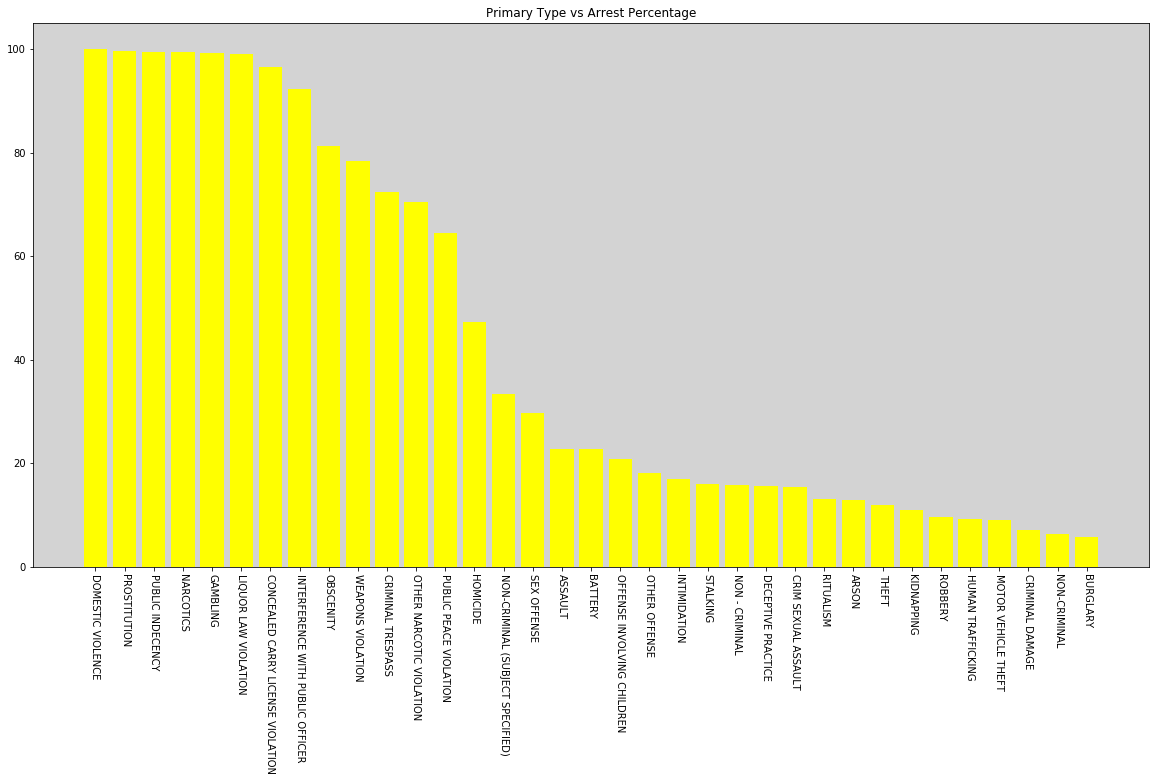

In [79]:
#using the after drop data to extract the number of the Arrests made per type of crime
Groupby_type=after_dropped_data[['Primary Type','Arrest','ID']].groupby(['Primary Type','Arrest']).count().reset_index()


#getting the Not Arrested value
Not_Arrested=Groupby_type.drop(Groupby_type[Groupby_type['Arrest']==True].index)
Not_Arrested=Not_Arrested.rename(columns={'ID':'Not Arrested'}).drop(columns=['Arrest'])


#getting the Arrested values
Arrested=Groupby_type.drop(Groupby_type[Groupby_type['Arrest']==False].index)
Arrested=Arrested.rename(columns={'ID':'Arrested'}).drop(columns=['Arrest'])

#merging the values of Arrested and Not Arrested based on Type of Crime
merged=pd.merge(Arrested,Not_Arrested,how='left', on='Primary Type')
#there is a hole in the data which is needed to be filled.
Groupby_type_Arrest=merged.fillna(0)

#checking if the dataframe has NaN or not
print(Groupby_type_Arrest.isna().any())

#Resulted DataFrame
Groupby_type_Arrest
#adding new column with percent arrests made per crime type
Groupby_type_Arrest['Arrest Percentage']=(Groupby_type_Arrest['Arrested']/(Groupby_type_Arrest['Arrested']+Groupby_type_Arrest['Not Arrested']))*100
Groupby_type_Arrest.sort_values('Arrest Percentage', ascending=False,inplace=True)
#Top
print(Groupby_type_Arrest.head())
print(Groupby_type_Arrest.tail())
print(Groupby_type_Arrest.drop(columns=['Primary Type']).describe())
plotTimes(Groupby_type_Arrest['Primary Type'],Groupby_type_Arrest['Arrest Percentage'],'Primary Type vs Arrest Percentage','Yellow','bar')

## Insights about types of Crime and their Arrest Rate
1. Plot shows Crimes like Domestic Violence, Prostitution,Public Indecency, Narcotics and Gambling having more than 99% percent of Arrest rate.  
2. Crimes Like Burglary,Criminal Damage,Robbery, Kidnapping,theft have Arrest rate less than 10%.
3. The Average arrest rate is 43.5 % with Std. Deviation  36.9%